In [ ]:
!pip install simpy
import simpy
import pandas as pd
import numpy  as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# listas de horários de chegada e saída das maquinas
entradas, saidas = [],[]
# listas de horários de chegada e saída das filas
in_queue, in_system  = [],[]
# tempo na fila e tamanho das filas
horarios_nas_filas, tamanho_da_fila = [],[]

def plotaFuncaoExponencial(quantidadeMateriaPrima, tempoPorQuantidadeMateriaPrima):
  fig, ax = plt.subplots()
  x = np.random.exponential(quantidadeMateriaPrima, tempoPorQuantidadeMateriaPrima)
  ax.text(quantidadeMateriaPrima, 400, r'$\lambda=' + str(quantidadeMateriaPrima) + '$')
  ax.hist(x, edgecolor="white")
  ax.set_xlabel('Eventos')
  ax.set_ylabel('Ocorrências')
  ax.set_title('Exponencial')
  ax.grid()
  fig.show()

def salva_info_da_fila(env, maquina):
    horario_producao = env.now
    tamanho_da_fila_agora = len(maquina.queue)
    horarios_nas_filas.append(horario_producao)
    tamanho_da_fila.append(tamanho_da_fila_agora)

    return horario_producao

def distribuicao_entrada_de_material():
  tempo_do_proximo_material = expon.rvs(scale = MEDIA_DE_CHEGADA_DE_MATERIAL, size = 1)
  return tempo_do_proximo_material

def calcula_tempo_no_sistema(env, horario_chegada):
  horario_saida = env.now
  saidas.append(horario_saida)
  tempo_total = horario_saida - horario_chegada
  in_system.append(tempo_total)

from scipy.stats import expon

MEDIA_DE_CHEGADA_DE_MATERIAL = 5
MEDIA_DO_TEMPO_DE_PRODUCAO = 10.0
DESVIO_PADRAO_DO_TEMPO_DE_PRODUCAO = 2

# Função que define a entrada de materiais
# usando alguma funcao de distribuicao de probabilidade,
# define a ordem e tempo de entrada dos materiais
def entrada_de_material(env):
    # ID para cada produto final
    produto_id = 0

    while True:
       ## tempo de chegada do proximo material
       tempo_do_proximo_material = distribuicao_entrada_de_material()
       # espera pelo próximo material
       yield env.timeout(tempo_do_proximo_material)

       # materia prima chegou, marca o tempo e guarda o tempo de chegada
       tempo_de_entrada = env.now
       entradas.append(tempo_de_entrada)
       produto_id += 1
       print('%3d entrou em producao em %.2f' % (produto_id, tempo_de_entrada))

       # executa a producao
       env.process(linha_de_producao(env, produto_id, tempo_de_entrada))

# pega o tempo de producao
def tempo_de_producao():
  return norm.rvs(loc = MEDIA_DO_TEMPO_DE_PRODUCAO,
                  scale = DESVIO_PADRAO_DO_TEMPO_DE_PRODUCAO,
                  size = 1)

# executa a linha de producao
def linha_de_producao(env, produto_id, horario_entrada):
    with maquinas.request() as req:
        print('%3d entrou na fila em %.2f' % (produto_id, env.now))
        horario_entrada_da_fila = salva_info_da_fila(env, maquinas)
        yield req # espera a maquina ser liberada

        print('%3d saiu da fila em %.2f' % (produto_id, env.now))
        horario_saida_da_fila = salva_info_da_fila(env, maquinas)

        # tempo que ficou na fila
        tempo_na_fila = horario_saida_da_fila - horario_entrada_da_fila
        in_queue.append(tempo_na_fila)

        # Execução da producao
        tempo_producao = tempo_de_producao()
        yield env.timeout(tempo_producao)
        print('%3d concluido em %.2f' % (produto_id, tempo_producao))

        # tempo total da operacao de producao + fila
        calcula_tempo_no_sistema(env, horario_entrada)

        # Simulação irá demorar 100 tempos
TEMPO_DE_SIMULACAO  = 100

# Seed fixo. Assim, será o mesmo valor todas as vezes que executarmos

np.random.seed(seed = 1)

## prepara o ambiente
env = simpy.Environment()

## Definindo recursos: Quantidade de maquinas disponíveis
QUANTIDADE_DE_MAQUINAS = 2
maquinas = simpy.Resource(env, capacity = QUANTIDADE_DE_MAQUINAS)

env.process(entrada_de_material(env))

# Roda a simulação
env.run(until = TEMPO_DE_SIMULACAO)




  1 entrou em producao em 2.70
  1 entrou na fila em 2.70
  1 saiu da fila em 2.70
  2 entrou em producao em 9.07
  2 entrou na fila em 9.07
  2 saiu da fila em 9.07
  3 entrou em producao em 11.60
  3 entrou na fila em 11.60
  1 concluido em 8.94
  3 saiu da fila em 11.64
  4 entrou em producao em 15.47
  4 entrou na fila em 15.47
  5 entrou em producao em 16.61
  5 entrou na fila em 16.61
  2 concluido em 7.85
  4 saiu da fila em 16.92
  3 concluido em 13.49
  5 saiu da fila em 25.13
  4 concluido em 8.48
  6 entrou em producao em 27.13
  6 entrou na fila em 27.13
  6 saiu da fila em 27.13
  7 entrou em producao em 27.89
  7 entrou na fila em 27.89
  8 entrou em producao em 28.99
  8 entrou na fila em 28.99
  6 concluido em 5.88
  7 saiu da fila em 33.01
  9 entrou em producao em 37.06
  9 entrou na fila em 37.06
  5 concluido em 12.92
  8 saiu da fila em 38.06
  7 concluido em 11.46
  9 saiu da fila em 44.47
 10 entrou em producao em 48.31
 10 entrou na fila em 48.31
  8 concluido e

# Análise dos Resultados

In [ ]:
df1 = pd.DataFrame(horarios_nas_filas, columns = ['horario'])
df2 = pd.DataFrame(tamanho_da_fila, columns = ['tamanho'])
df3 = pd.DataFrame(entradas, columns = ['entradas'])
df4 = pd.DataFrame(saidas, columns = ['saidas'])

df_tamanho_da_fila = pd.concat([df1, df2], axis = 1)
df_entrada_saida = pd.concat([df3, df4], axis = 1)


# Gráfico com as entradas e saídas de cada elemento

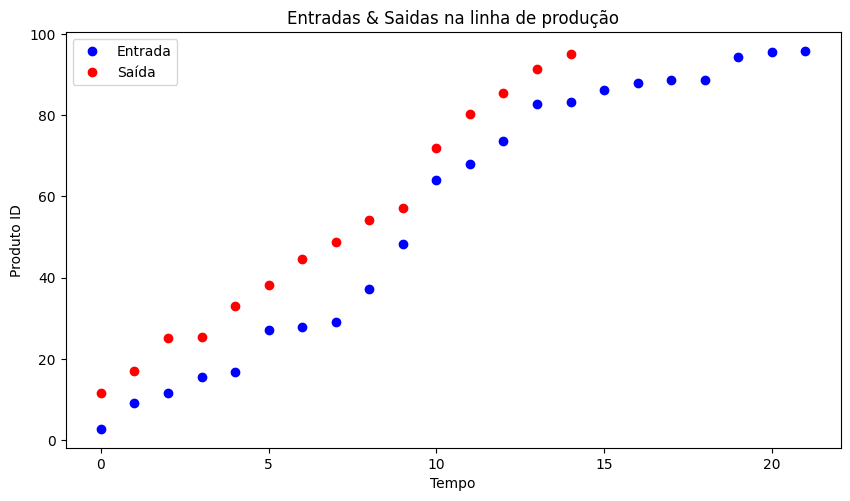

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10, 5.4)

# Supondo que você já tenha as colunas 'entradas' e 'saidas' em seu DataFrame
x1, y1 = df_entrada_saida.index, df_entrada_saida['entradas']
x2, y2 = df_entrada_saida.index, df_entrada_saida['saidas']

ax.plot(x1, y1, color='blue', marker="o", linewidth=0, label="Entrada")
ax.plot(x2, y2, color='red', marker="o", linewidth=0, label="Saída")
ax.set_xlabel('Tempo')
ax.set_ylabel('Produto ID')
ax.set_title("Entradas & Saidas na linha de produção")
ax.legend()

plt.show()

# Gráfico com o tempo com o tamanho de tempo na fila

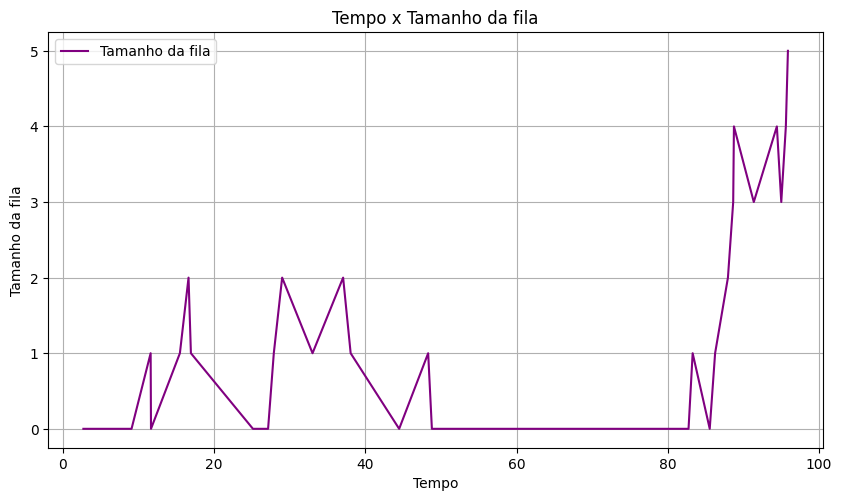

In [ ]:
import matplotlib.pyplot as plt

# Use os dados do DataFrame df_tamanho_da_fila
x1 = df_tamanho_da_fila['horario']
y1 = df_tamanho_da_fila['tamanho']

plt.figure(figsize=(10, 5.4))
plt.plot(x1, y1, color='purple', label="Tamanho da fila")
plt.xlabel('Tempo')
plt.ylabel('Tamanho da fila')
plt.title("Tempo x Tamanho da fila")
plt.legend()
plt.grid(True)
plt.show()

# Métricas Globais

In [ ]:
NUMERO_DE_DESISTENTES  = 4

def media_fila(df_tamanho_fila):
    if df_tamanho_fila.empty:
        return 0.0

    df_tamanho_fila['delta'] = df_tamanho_fila['horario'].shift(-1) - df_tamanho_fila['horario']
    df_tamanho_fila = df_tamanho_fila[0:-1]
    return np.average(df_tamanho_fila['tamanho'], weights=df_tamanho_fila['delta'])

def utilizacao_servico(df_tamanho_fila):
    tempo_servico_livre = df_tamanho_fila[df_tamanho_fila['tamanho'] == 0]['delta'].sum()
    primeiro_evento = df_tamanho_fila['horario'].iloc[0]
    soma_servico_livre = tempo_servico_livre + primeiro_evento
    return round((1 - soma_servico_livre / TEMPO_DE_SIMULACAO) * 100, 2)

def porcentagem_nao_esperaram(df_tamanho_fila):
    soma_nao_esperaram = df_tamanho_fila[df_tamanho_fila['tamanho'] >= NUMERO_DE_DESISTENTES]['delta'].sum()
    return round((soma_nao_esperaram / TEMPO_DE_SIMULACAO) * 100, 2)

df1 = pd.DataFrame(horarios_nas_filas, columns=['horario'])
df2 = pd.DataFrame(tamanho_da_fila, columns=['tamanho'])
df_tamanho_da_fila = pd.concat([df1, df2], axis=1)

tempo_medio_na_fila_simulacao = media_fila(df_tamanho_da_fila)
utilizacao_servico_simulacao = utilizacao_servico(df_tamanho_da_fila)
porcentagem_nao_esperaram_simulacao = porcentagem_nao_esperaram(df_tamanho_da_fila)

print('O tempo médio na fila é de %.2f' % tempo_medio_na_fila_simulacao)
print('O tempo médio no sistema é %.2f' % np.mean(in_system))
print('O número médio de materia prima na fila é %.2f' % np.mean(in_queue))
print('A utilização do serviço é %.2f %%' % utilizacao_servico_simulacao)
print('A probabilidade de materia prima que não ficaram na fila é %.2f %%' % porcentagem_nao_esperaram_simulacao)

O tempo médio na fila é de 0.67
O tempo médio no sistema é 12.14
O número médio de materia prima na fila é 2.74
A utilização do serviço é 42.78 %
A probabilidade de materia prima que não ficaram na fila é 3.48 %
